## Is it a Pikachu?

In [1]:
# NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
# This code is only here to check that your internet is enabled. It doesn't do anything else.
# Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook

     |████████████████████████████████| 75 kB 3.0 MB/s             
     |████████████████████████████████| 97 kB 5.5 MB/s             
     |████████████████████████████████| 7.3 MB 57.8 MB/s            
     |████████████████████████████████| 74 kB 2.7 MB/s             
     |████████████████████████████████| 2.8 MB 50.2 MB/s            
     |████████████████████████████████| 57 kB 5.0 MB/s             
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:
      Successfully uninstalled click-8.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
spacy 3.2.3 requires typing-extensions<4.0.0.0,>=3.7.4; py

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

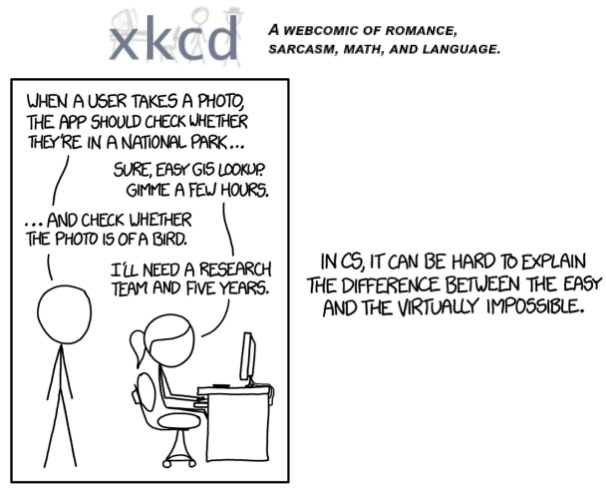

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of pikachus and non-pikachus

In [14]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


Let's start by searching for a pikachu photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [15]:
# NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
# If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('pikachu photos', max_images=1)
urls[0]

Searching for 'pikachu photos'


'https://wallpapercave.com/wp/wp4581638.jpg'

...and then download a URL and take a look at it:

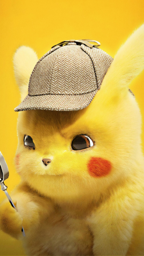

In [16]:
from fastdownload import download_url
dest = 'pikachu.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "eevee photos":

Searching for 'eevee photos'


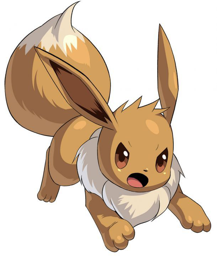

In [17]:
download_url(search_images('eevee photos', max_images=1)[0], 'eevee.jpg', show_progress=False)
Image.open('eevee.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "pikachu" and "eevee" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [18]:
searches = 'eevee','pikachu'
path = Path('pikachu_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} anime photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} fanart photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'eevee photo'
Searching for 'eevee anime photo'
Searching for 'eevee fanart photo'
Searching for 'pikachu photo'
Searching for 'pikachu anime photo'
Searching for 'pikachu fanart photo'


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:1018: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [20]:
print(path)
searches = 'eevee','pikachu'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

pikachu_or_not
eevee
05475f1b-ef44-42f5-b8c1-9d16c40b1ebe.jpg
5bf5dbc1-f0cd-4dbc-bb41-ecdd5568b089.png
be878a91-6b9d-4b15-b65b-cad1b7d8994b.jpg
ed6cc09a-45f6-4f98-b0fe-b1ccbad079f9.jpg
2ac7d7af-27dc-4a2a-a353-44c784247874.png
a3740274-0334-40b1-96fd-f86b8bb07cab.png
b43a022f-b429-41a9-8ee5-8bde3b92a7d6.jpg
f985a248-f2c7-47ac-a8ea-196cbec763a9.jpg
bca61741-b0a3-4068-8571-b7c1cd3956ed.png
e8b65480-aff9-49b5-926c-e561200b7aa3.png
45dec399-f052-49e3-8f11-580077dd14e0.jpg
31aa6377-258d-47eb-890b-5fc4efe5e6ba.jpg
326caa4b-6d5b-4ed1-885c-e761c9b1f9e0.jpg
e8d40799-2297-4482-9459-a3a512853af5.jpg
aeb62cbb-7bca-4506-b0a0-eb15c6f10398.png
23cc7563-1d1b-4cdd-8b79-bcf76a3d07b5.png
c94c0eca-e273-43cf-839a-0b9c39895ed8.jpg
df72e6b0-75be-403d-8d06-8d8e55ff7827.jpg
b21643e0-2a35-458c-8a31-43f08add8630.jpg
aaa8a893-e0b2-4236-bddb-f699c2d5c46e.jpg
913176fb-585d-4db6-919f-67acbf9704ff.png
6612ac3e-5f68-4e37-9dac-44f0e38d9d65.jpg
0bf4adea-02e4-40dc-a386-51efc66e905c.jpg
0a5727a3-53a3-4aba-aa81-42f88f6a9f7f

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

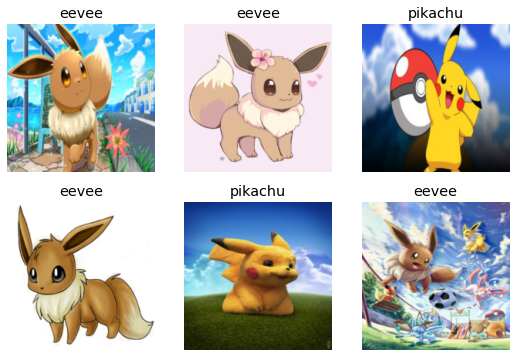

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "pikachu" or "eevee").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.049217,1.364047,0.424242,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.387264,0.554328,0.212121,00:01
1,0.218582,0.185914,0.090909,00:01
2,0.160345,0.087467,0.030303,00:01


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we downloaded at the start:

In [24]:
is_pikachu,_,probs = learn.predict(PILImage.create('pikachu.jpg'))
print(f"This is a: {is_pikachu}.")
print(f"Probability it's a Pikachu: {probs[0]:.4f}")

This is a: pikachu.
Probability it's a Pikachu: 0.0018


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.